In [1]:
import time
# start_time = time.time()
# main()
# print("--- %s seconds ---" % (time.time() - start_time))

In [2]:
from utils import *
import random
from sklearn.neighbors import kneighbors_graph
import matplotlib
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 15}

matplotlib.rc('font', **font)

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [21]:
def erdos_renyi_runtime(ps, k, node_num=1000, log=True):
    runtimes = []
    sizes = []
    cores = []
    for p1 in ps:
        temp_size = []
        temp_times = []
        temp_core = []
        for p2 in ps:

            test1 = nx.erdos_renyi_graph(node_num, p1)

            test2 = nx.erdos_renyi_graph(node_num, p2)

            start_time = time.time()
            S, mindeg = k_conn_min_deg(test1, test2, k, verbose=False)
            temp_times.append(time.time() - start_time)
            temp_size.append(len(S))
            core_dict = nx.core_number(test2)
            core_set = set()
            for i in core_dict:
                core_set.add(core_dict[i])
            temp_core.append(len(core_set))
            if log:
                print 'p1=', p1, 'p2=', p2, 'connected?', nx.is_connected(test1), nx.is_connected(test2)
                print 'S size =', len(S), 'min deg =', mindeg
                print("--- %s seconds ---" % temp_times[-1])

        runtimes.append(temp_times)
        sizes.append(temp_size)
        cores.append(temp_core)
    return runtimes, sizes, cores

In [4]:
def plot_heatmap(ps, runtimes, k, savefig=True):
    fig, ax = plt.subplots()
    runtimes = [[round(i, 2) for i in l] for l in runtimes]
    im = ax.imshow(runtimes)

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(ps)))
    ax.set_yticks(np.arange(len(ps)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(ps)
    ax.set_yticklabels(ps)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(ps)):
        for j in range(len(ps)):
            text = ax.text(j, i, runtimes[i][j],
                           ha="center", va="center", color="w")

    plt.xlabel('p of H')
    plt.ylabel('p of G')
    # ax.set_title("running time in sec")
    fig.tight_layout()
    if savefig:
        plt.savefig('runtime_synthetic_k='+str(k)+'.png')
    plt.show()

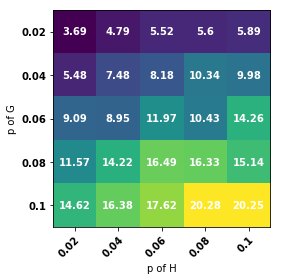

In [18]:
runtime_2, size_2 = erdos_renyi_runtime([0.02, 0.04, 0.06, 0.08, 0.1], 2, log=False)
runtime_2 = np.array(runtime_2)
size_2 = np.array(size_2)
for i in range(4):
    cur_runtime, cur_size = erdos_renyi_runtime([0.02, 0.04, 0.06, 0.08, 0.1], 2, log=False)
    runtime_2 += np.array(cur_runtime)
    size_2 += np.array(cur_size)

plot_heatmap([0.02, 0.04, 0.06, 0.08, 0.1], runtime_2/5, 2)


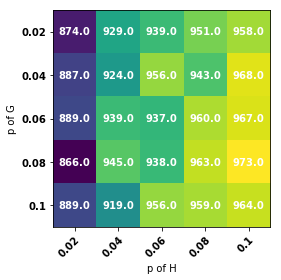

In [19]:
plot_heatmap([0.02, 0.04, 0.06, 0.08, 0.1], size_2/5, 2, savefig=False)

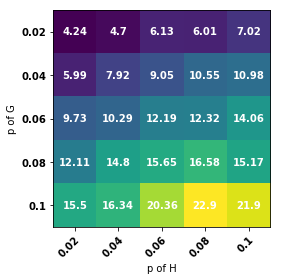

In [22]:
runtime_4, size_4, core_4 = erdos_renyi_runtime([0.02, 0.04, 0.06, 0.08, 0.1], 4, log=False)
runtime_4 = np.array(runtime_4)
size_4 = np.array(size_4)
core_4 = np.array(core_4)
for i in range(4):
    cur_runtime, cur_size, cur_core = erdos_renyi_runtime([0.02, 0.04, 0.06, 0.08, 0.1], 4, log=False)
    runtime_4 += np.array(cur_runtime)
    size_4 += np.array(cur_size)
    core_4 += np.array(cur_core)

plot_heatmap([0.02, 0.04, 0.06, 0.08, 0.1], runtime_4/5, 4)


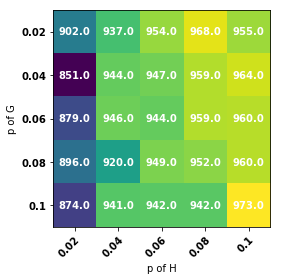

In [23]:
plot_heatmap([0.02, 0.04, 0.06, 0.08, 0.1], size_4/5, 4, savefig=False)

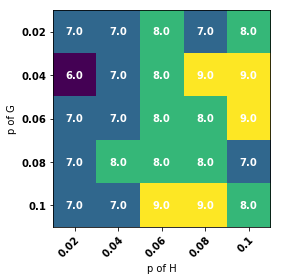

In [24]:
plot_heatmap([0.02, 0.04, 0.06, 0.08, 0.1], core_4/5, 4, savefig=False)

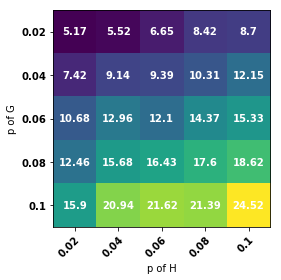

In [26]:
runtime_8, size_8, core_8 = erdos_renyi_runtime([0.02, 0.04, 0.06, 0.08, 0.1], 8, log=False)
runtime_8 = np.array(runtime_8)
size_8 = np.array(size_8)
core_8 = np.array(core_8)
for i in range(4):
    cur_runtime, cur_size, cur_core = erdos_renyi_runtime([0.02, 0.04, 0.06, 0.08, 0.1], 8, log=False)
    runtime_8 += np.array(cur_runtime)
    size_8 += np.array(cur_size)
    core_8 += np.array(cur_core)

plot_heatmap([0.02, 0.04, 0.06, 0.08, 0.1], runtime_8/5, 8)

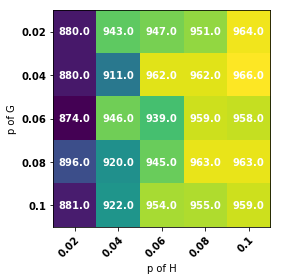

In [27]:
plot_heatmap([0.02, 0.04, 0.06, 0.08, 0.1], size_8/5, 8, savefig=False)

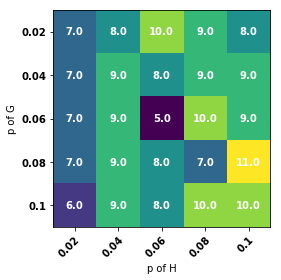

In [29]:
plot_heatmap([0.02, 0.04, 0.06, 0.08, 0.1], core_8, 8, savefig=False)